In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
from sklearn.preprocessing import LabelEncoder
import math

In [2]:
df = pd.read_csv("C:/Users/singh/Desktop/TAP/btcNews_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2146 non-null   object 
 1   top_0     2146 non-null   object 
 2   top_1     2119 non-null   object 
 3   top_2     2047 non-null   object 
 4   top_3     1849 non-null   object 
 5   top_4     1629 non-null   object 
 6   top_5     1382 non-null   object 
 7   top_6     1156 non-null   object 
 8   top_7     980 non-null    object 
 9   top_8     842 non-null    object 
 10  top_9     742 non-null    object 
 11  top_10    670 non-null    object 
 12  top_11    587 non-null    object 
 13  top_12    502 non-null    object 
 14  top_13    434 non-null    object 
 15  top_14    367 non-null    object 
 16  top_15    304 non-null    object 
 17  top_16    269 non-null    object 
 18  top_17    229 non-null    object 
 19  top_18    197 non-null    object 
 20  top_19    166 non-null    obje

In [3]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12-07-2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13-07-2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14-07-2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,15-07-2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,16-07-2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


# <font color ="006179"> Pre Processing </font>
- Remove non-numeric characters: For columns that may contain non-numeric symbols (such as 'K' for thousands), you can strip those characters and convert the values into numeric form.
- Convert percentages: If you have percentages (like in the 'change %' column), you can remove the % sign and convert them to decimals.

In [4]:
import pandas as pd

# Load dataset (uncomment this line to load your CSV file)
# df = pd.read_csv("C:/Users/singh/Desktop/TAP/btcNews_Data.csv")

# Rename columns to avoid special character issues
df.rename(columns={'vol.': 'volume', 'change %': 'change_percent'}, inplace=True)

# Clean 'volume' column (remove 'K', 'M', 'B' and convert to float)
df['volume'] = df['volume'].replace({'K': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True).astype(float)

# Clean 'change_percent' column (convert to string, remove '%', and convert to float)
df['change_percent'] = df['change_percent'].astype(str).str.replace('%', '').astype(float)

# Convert 'date' column to datetime (assuming format is 'day-month-year')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Display the first few rows of the cleaned DataFrame
print(df.head())

        date                                              top_0  \
0 2015-07-12  bitcoin the next logical step in the rise of u...   
1 2015-07-13  bitgive foundation announces new initiatives a...   
2 2015-07-14  keynote 2015  harnessing the distributed ledge...   
3 2015-07-15  patrick byrne says   will be able to replace w...   
4 2015-07-16  2015 q1 bitcoin investment trumps 2014 numbers...   

                                               top_1  \
0  the blockchain  towards crypto sovereignty    ...   
1  bitcoin in review  interesting trends in q1 of...   
2  cash back vs bitcoin  why bitcoin can be super...   
3  bitcoin based transparent marketplaces can pre...   
4  california wants to suspend uber in attempt to...   

                                               top_2  \
0  coinbase outage is a reminder to not store bit...   
1  cloudminr user accounts hacked  data sold for ...   
2  force or mathematics  fiat vs cryptocurrency  ...   
3  vladimir putin speaks out in favo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2146 non-null   datetime64[ns]
 1   top_0           2146 non-null   object        
 2   top_1           2119 non-null   object        
 3   top_2           2047 non-null   object        
 4   top_3           1849 non-null   object        
 5   top_4           1629 non-null   object        
 6   top_5           1382 non-null   object        
 7   top_6           1156 non-null   object        
 8   top_7           980 non-null    object        
 9   top_8           842 non-null    object        
 10  top_9           742 non-null    object        
 11  top_10          670 non-null    object        
 12  top_11          587 non-null    object        
 13  top_12          502 non-null    object        
 14  top_13          434 non-null    object        
 15  top_

# <font color ="006179"> Line Plot for Historical Price Movements </font>

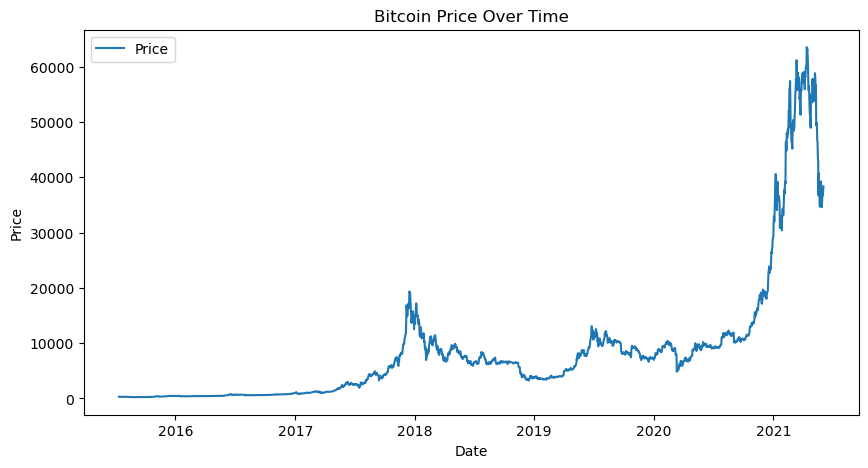

In [6]:
import matplotlib.pyplot as plt

# Set 'date' as index for time series analysis (without dropping the column)
df_with_date_index = df.set_index('date', drop=False)

# Plot historical price movements
plt.figure(figsize=(10, 5))
plt.plot(df_with_date_index['price'], label='Price')  # Use the 'price' column for plotting
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2146 non-null   datetime64[ns]
 1   top_0           2146 non-null   object        
 2   top_1           2119 non-null   object        
 3   top_2           2047 non-null   object        
 4   top_3           1849 non-null   object        
 5   top_4           1629 non-null   object        
 6   top_5           1382 non-null   object        
 7   top_6           1156 non-null   object        
 8   top_7           980 non-null    object        
 9   top_8           842 non-null    object        
 10  top_9           742 non-null    object        
 11  top_10          670 non-null    object        
 12  top_11          587 non-null    object        
 13  top_12          502 non-null    object        
 14  top_13          434 non-null    object        
 15  top_

# <font color ="006179"> Moving Averages for Smoothing Trends</font>

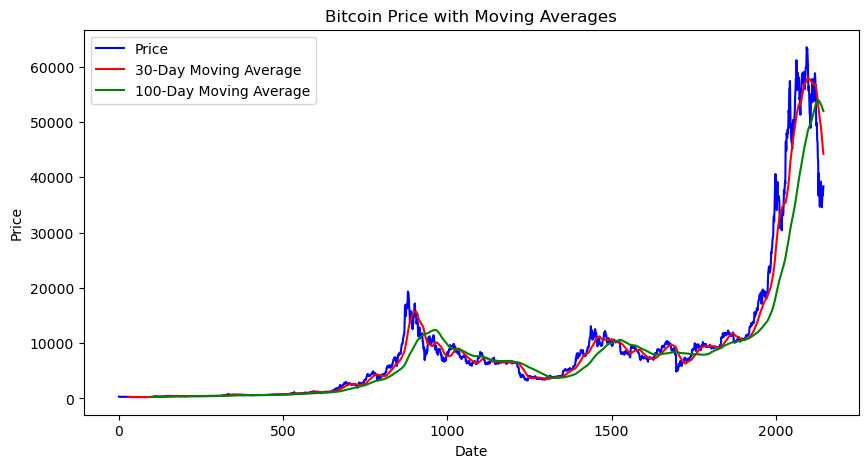

In [8]:
df['short_mavg'] = df['price'].rolling(window=30).mean()  # 30-day moving average
df['long_mavg'] = df['price'].rolling(window=100).mean()  # 100-day moving average

plt.figure(figsize=(10, 5))
plt.plot(df['price'], label='Price', color='blue')
plt.plot(df['short_mavg'], label='30-Day Moving Average', color='red')
plt.plot(df['long_mavg'], label='100-Day Moving Average', color='green')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# <font color ="006179"> Histogram for Price Distribution</font>

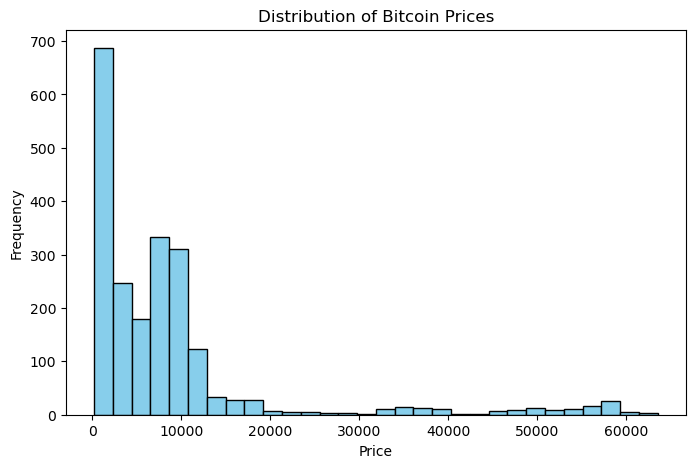

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# <font color ="006179"> Distribution and Normal Fit for Price, Open, High, Low, Change % and Volume </font>

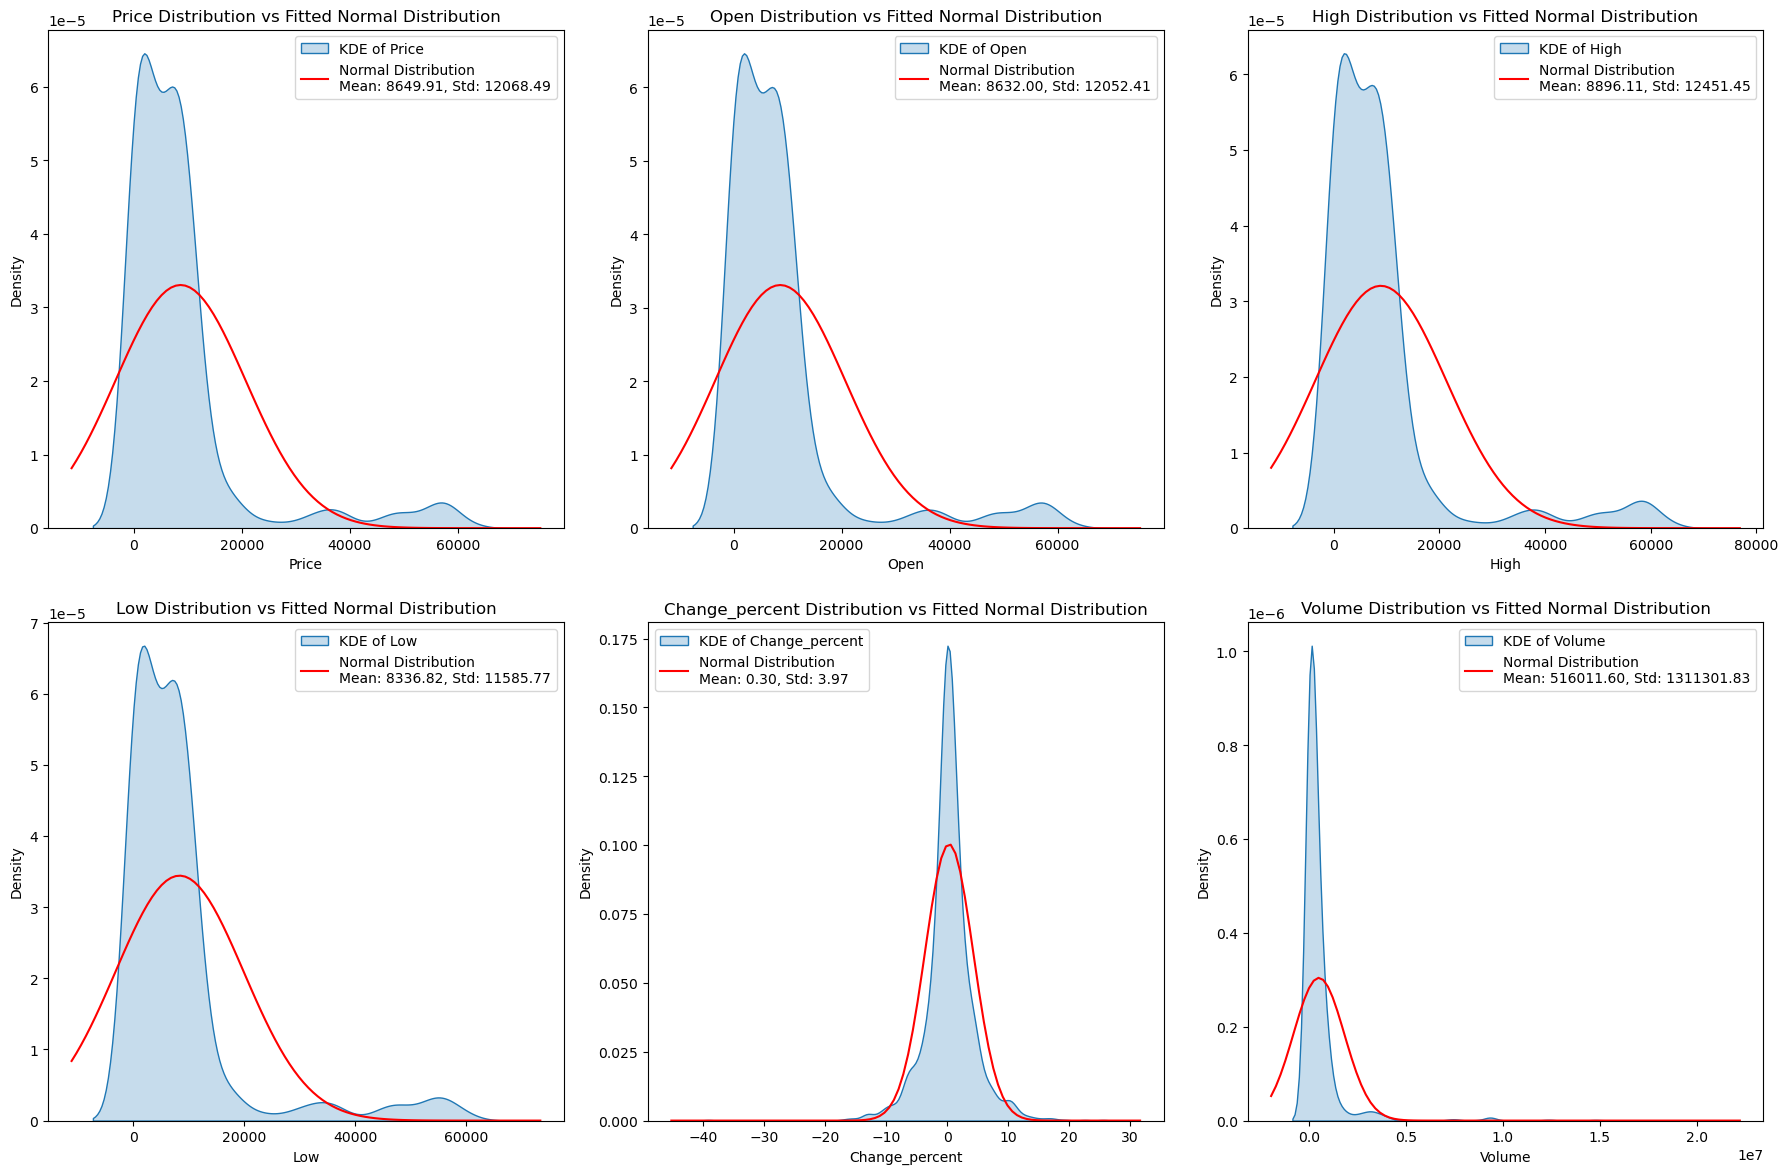

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df is the cleaned dataframe with the required columns

# List of variables to plot (added 'volume' to the list)
variables = ['price', 'open', 'high', 'low', 'change_percent', 'volume']

# Set up a grid of 2 rows and 3 columns for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Loop through each variable and create a plot
for i, var in enumerate(variables):
    # Fit the data to a normal distribution
    mu, std = norm.fit(df[var])
    
    # 1. Plot the KDE (Bell Curve) for the distribution
    sns.kdeplot(df[var], fill=True, ax=axes[i], label=f'KDE of {var.capitalize()}')
    
    # 2. Plot the Normal Distribution Curve (Theoretical)
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'r', label=f'Normal Distribution\nMean: {mu:.2f}, Std: {std:.2f}')
    
    # Set titles and labels for each plot
    axes[i].set_title(f'{var.capitalize()} Distribution vs Fitted Normal Distribution')
    axes[i].set_xlabel(f'{var.capitalize()}')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show plot
plt.show()

# <font color ="006179"> Scatter Plot to Analyze Relationships - Price and Volume </font>

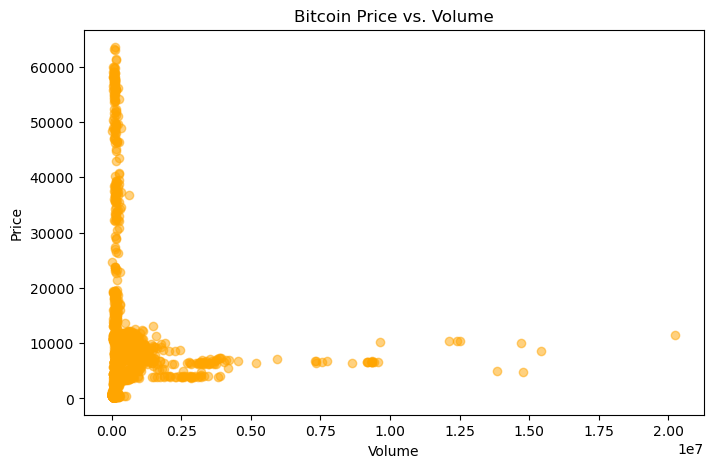

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(df['volume'], df['price'], alpha=0.5, color='orange')
plt.title('Bitcoin Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()


# <font color ="006179"> Parametric and Non Paramteric </font>

In [12]:
df.info()
df.dtypes
print(df['date'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2146 non-null   datetime64[ns]
 1   top_0           2146 non-null   object        
 2   top_1           2119 non-null   object        
 3   top_2           2047 non-null   object        
 4   top_3           1849 non-null   object        
 5   top_4           1629 non-null   object        
 6   top_5           1382 non-null   object        
 7   top_6           1156 non-null   object        
 8   top_7           980 non-null    object        
 9   top_8           842 non-null    object        
 10  top_9           742 non-null    object        
 11  top_10          670 non-null    object        
 12  top_11          587 non-null    object        
 13  top_12          502 non-null    object        
 14  top_13          434 non-null    object        
 15  top_

# <font color ="006179"> Parametric Measure </font>

In [13]:
import numpy as np

# Parametric measures: mean, median, variance, standard deviation
parametric_measures = df[['price', 'open', 'high', 'low', 'volume', 'change_percent']].describe()

print("Parametric Measures (mean, std, min, 25%, 50%, 75%, max):")
print(parametric_measures)

Parametric Measures (mean, std, min, 25%, 50%, 75%, max):
              price          open          high           low        volume  \
count   2146.000000   2146.000000   2146.000000   2146.000000  2.146000e+03   
mean    8649.910485   8632.001165   8896.109925   8336.822973  5.160116e+05   
std    12071.304908  12055.215223  12454.354964  11588.466405  1.311607e+06   
min      211.400000    211.400000    226.600000    196.300000  2.400000e+03   
25%      896.000000    894.600000    914.700000    871.800000  6.817250e+04   
50%     6394.950000   6391.000000   6528.800000   6278.900000  1.446900e+05   
75%     9578.575000   9568.525000   9750.700000   9325.050000  5.157025e+05   
max    63540.900000  63544.200000  64778.000000  62067.500000  2.026000e+07   

       change_percent  
count     2146.000000  
mean         0.303504  
std          3.975095  
min        -39.180000  
25%         -1.180000  
50%          0.210000  
75%          1.817500  
max         25.560000  


# <font color ="006179"> One-Way ANOVA </font>

In [14]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a new dataframe to avoid modifying the original one
df_test = df.copy()

# Divide the 'change_percent' into three categories (low, medium, high)
bins = [-np.inf, -2, 2, np.inf]  # Example: Low, Medium, High based on percentage change
labels = ['Low', 'Medium', 'High']

df_test['change_percent_category'] = pd.cut(df_test['change_percent'], bins=bins, labels=labels)

# Perform ANOVA to check if the means of 'change_percent' differ across the categories
stat, p_value = stats.f_oneway(
    df_test[df_test['change_percent_category'] == 'Low']['change_percent'],
    df_test[df_test['change_percent_category'] == 'Medium']['change_percent'],
    df_test[df_test['change_percent_category'] == 'High']['change_percent']
)

# Print the ANOVA result
print("ANOVA Results for change_percent:")
print(f"F-Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")


ANOVA Results for change_percent:
F-Statistic: 2263.7461
P-Value: 0.0000
There is a significant difference between the means of the groups.


# <font color ="006179"> Non Parametric Measure </font>

In [15]:
# 1. c. Compute non-parametric measures
# Non-parametric measures include median and interquartile range (IQR)

# Compute median and IQR for 'price'
median_price = df['price'].median()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

# Compute median and IQR for 'open'
median_open = df['open'].median()
iqr_open = df['open'].quantile(0.75) - df['open'].quantile(0.25)

# Compute median and IQR for 'high'
median_high = df['high'].median()
iqr_high = df['high'].quantile(0.75) - df['high'].quantile(0.25)

# Compute median and IQR for 'low'
median_low = df['low'].median()
iqr_low = df['low'].quantile(0.75) - df['low'].quantile(0.25)

# Print the results
print(f"Median and IQR for Bitcoin Price:\nMedian: {median_price}, IQR: {iqr_price}")
print(f"Median and IQR for Opening Price:\nMedian: {median_open}, IQR: {iqr_open}")
print(f"Median and IQR for High Price:\nMedian: {median_high}, IQR: {iqr_high}")
print(f"Median and IQR for Low Price:\nMedian: {median_low}, IQR: {iqr_low}")

Median and IQR for Bitcoin Price:
Median: 6394.95, IQR: 8682.575
Median and IQR for Opening Price:
Median: 6391.0, IQR: 8673.925
Median and IQR for High Price:
Median: 6528.8, IQR: 8836.0
Median and IQR for Low Price:
Median: 6278.9, IQR: 8453.25


# <font color ="006179"> Mann-Whitney U Test for other numerical values </font>

In [16]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a new copy of the original dataframe to avoid modifying the original one
df_copy2 = df.copy()

# Find the median of the 'price' column to create two groups
price_median = df_copy2['price'].median()

# Create two groups based on 'price' (above or below the median)
df_copy2['price_group'] = np.where(df_copy2['price'] > price_median, 'Above Median', 'Below Median')

# List of numerical variables to compare
numerical_vars = ['volume', 'open', 'low', 'price', 'high']

# Perform Mann-Whitney U Test for each numerical variable
for var in numerical_vars:
    group1 = df_copy2[df_copy2['price_group'] == 'Above Median'][var]
    group2 = df_copy2[df_copy2['price_group'] == 'Below Median'][var]
    
    # Mann-Whitney U Test
    stat, p_value = stats.mannwhitneyu(group1, group2)
    
    # Print the result
    print(f"Mann-Whitney U Test for {var}:")
    print(f"U-Statistic: {stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.05:
        print("There is a significant difference between the two groups.\n")
    else:
        print("There is no significant difference between the two groups.\n")



Mann-Whitney U Test for volume:
U-Statistic: 893447.5000
P-Value: 0.0000
There is a significant difference between the two groups.

Mann-Whitney U Test for open:
U-Statistic: 1149961.0000
P-Value: 0.0000
There is a significant difference between the two groups.

Mann-Whitney U Test for low:
U-Statistic: 1150884.0000
P-Value: 0.0000
There is a significant difference between the two groups.

Mann-Whitney U Test for price:
U-Statistic: 1151329.0000
P-Value: 0.0000
There is a significant difference between the two groups.

Mann-Whitney U Test for high:
U-Statistic: 1150246.0000
P-Value: 0.0000
There is a significant difference between the two groups.



# <font color ="006179"> Friedman Test for other numerical values </font>

In [17]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a new copy of the original dataframe (assuming df3 is already loaded)
df3 = df.copy()  # If df3 isn't already created, use df.copy() as an example

# List of numerical variables to compare
numerical_vars = ['volume', 'open', 'low', 'price', 'high']

# Apply the Friedman Test on the numerical variables in df3
stat, p_value = stats.friedmanchisquare(df3['volume'], df3['open'], df3['low'], df3['price'], df3['high'])

# Print the result
print("Friedman Test Results:")
print(f"Chi-Square Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the distributions of the variables.\n")
else:
    print("There is no significant difference between the distributions of the variables.\n")


Friedman Test Results:
Chi-Square Statistic: 8070.5948
P-Value: 0.0000
There is a significant difference between the distributions of the variables.



# <font color ="006179">  2. Handling Missing Values in Time Series </font>

# <font color ="006179">  a. Identify the extent and nature of missing values in the dataset.</font>

In [18]:
# Check for missing values in the dataset
missing_values = df.isna().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
date                 0
top_0                0
top_1               27
top_2               99
top_3              297
top_4              517
top_5              764
top_6              990
top_7             1166
top_8             1304
top_9             1404
top_10            1476
top_11            1559
top_12            1644
top_13            1712
top_14            1779
top_15            1842
top_16            1877
top_17            1917
top_18            1949
top_19            1980
top_20            2003
top_21            2036
top_22            2064
top_23            2080
top_24            2093
top_25            2108
top_26            2118
top_27            2124
top_28            2127
top_29            2130
top_30            2134
top_31            2135
top_32            2135
top_33            2141
top_34            2143
top_35            2145
price                0
open                 0
high                 0
low                  0
volume               0
cha

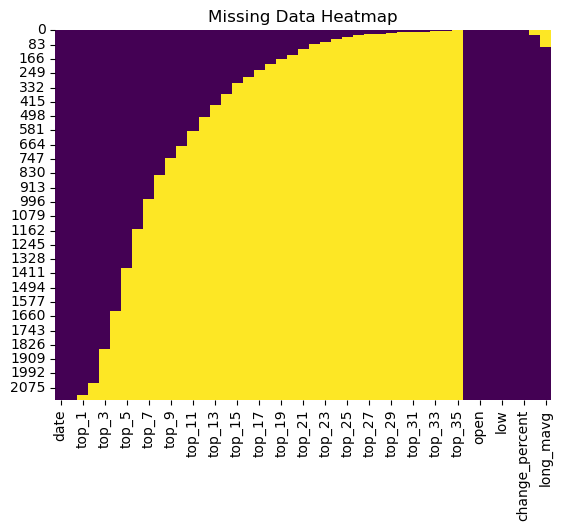

In [19]:
# Visualizing missing values in the dataset using a heatmap
import seaborn as sns
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##Percentage 

# <font color ="006179">  b. Explore the way to handle missing values in time series.</font>

Handling Missing Data with Z-Score:
The Z-score method is useful for detecting outliers or extreme values in your time series data. For missing data imputation, you can use it to replace missing values with the mean or median of the dataset if the Z-score indicates that the missing value is not an outlier.

In [20]:
missing_values_after_imputation = df.isna().sum()
print(f"Missing values after imputation:\n{missing_values_after_imputation}")

Missing values after imputation:
date                 0
top_0                0
top_1               27
top_2               99
top_3              297
top_4              517
top_5              764
top_6              990
top_7             1166
top_8             1304
top_9             1404
top_10            1476
top_11            1559
top_12            1644
top_13            1712
top_14            1779
top_15            1842
top_16            1877
top_17            1917
top_18            1949
top_19            1980
top_20            2003
top_21            2036
top_22            2064
top_23            2080
top_24            2093
top_25            2108
top_26            2118
top_27            2124
top_28            2127
top_29            2130
top_30            2134
top_31            2135
top_32            2135
top_33            2141
top_34            2143
top_35            2145
price                0
open                 0
high                 0
low                  0
volume               0
c

In [21]:
# Calculate Z-scores for numeric columns (excluding 'date')
from scipy.stats import zscore

# Calculate the Z-score for 'price' and other numerical columns
df['price_zscore'] = zscore(df['price'].dropna())

# Check rows with a Z-score above a threshold (e.g., 3)
outliers = df[df['price_zscore'].abs() > 3]
print(f"Outliers (Z-score > 3):\n{outliers}")

Outliers (Z-score > 3):
           date                                              top_0  \
2030 2021-02-08   tesla s purchase of  1 5b of bitcoin continue...   
2031 2021-02-09   do i think that tesla did the right thing  ab...   
2033 2021-02-11  the law enforcement agency says the criminals ...   
2034 2021-02-12   i also see the reality  cryptocurrencies have...   
2035 2021-02-13   if you re into cryptos  you want to consider ...   
...         ...                                                ...   
2123 2021-05-12  hungary to reduce tax on capital gains from  c...   
2124 2021-05-13  latest fundings in the  blockchain space go to...   
2125 2021-05-14  musk s tweet on bitcoin s energy footprint ign...   
2126 2021-05-15   we are the first municipality in the state of...   
2127 2021-05-16  unlike tesla  mark cuban says the dallas maver...   

                                                  top_1  \
2030  the infrastructure is ready  and in a first st...   
2031   as for the

In [22]:
# Handle missing values: Use mean imputation for missing 'price' based on Z-scores
df['price'] = df['price'].fillna(df['price'].mean())
df

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_35,price,open,high,low,volume,change_percent,short_mavg,long_mavg,price_zscore
0,2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120700.0,6.33,NaN,NaN,-0.691015
1,2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,NaN,290.4,310.4,310.9,276.9,146850.0,-6.47,NaN,NaN,-0.692672
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,NaN,287.0,290.4,297.0,285.2,60620.0,-1.17,NaN,NaN,-0.692954
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,NaN,283.4,287.0,292.9,283.2,59580.0,-1.23,NaN,NaN,-0.693252
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,NaN,276.6,283.4,290.8,273.3,121320.0,-2.41,NaN,NaN,-0.693816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2021-05-30,after the installation of microbt whatsminers ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35652.8,34589.3,36388.6,33441.0,104180.0,3.09,46739.663333,52657.224,2.237470
2142,2021-05-31,brazil is one of the pioneers of cdbc s study ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37298.6,35644.0,37480.7,34213.2,131700.0,4.62,46056.046667,52470.973,2.373842
2143,2021-06-01,our maiden sto listing on the dbs digital ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36687.6,37294.3,37850.3,35742.7,113480.0,-1.64,45392.173333,52263.511,2.323214
2144,2021-06-02,expanding cryptocurrency analysis to find and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37555.8,36687.7,38199.9,35981.1,96890.0,2.37,44738.373333,52097.951,2.395153


Rolling Average Method:
Use a rolling mean to impute missing values based on the surrounding values in the time series.
Typically, a window size of 7 days, 14 days, or 30 days is used, depending on the frequency of the data.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2146 non-null   datetime64[ns]
 1   top_0           2146 non-null   object        
 2   top_1           2119 non-null   object        
 3   top_2           2047 non-null   object        
 4   top_3           1849 non-null   object        
 5   top_4           1629 non-null   object        
 6   top_5           1382 non-null   object        
 7   top_6           1156 non-null   object        
 8   top_7           980 non-null    object        
 9   top_8           842 non-null    object        
 10  top_9           742 non-null    object        
 11  top_10          670 non-null    object        
 12  top_11          587 non-null    object        
 13  top_12          502 non-null    object        
 14  top_13          434 non-null    object        
 15  top_

In [24]:
# Calculate the rolling mean for the 'price' column with a window of 7 days
df['price_rolling_avg'] = df['price'].rolling(window=7, min_periods=1).mean()

# Fill missing values with the rolling average
df['price'] = df['price'].fillna(df['price_rolling_avg'])

# Recheck missing values
missing_values_after_imputation = df.isna().sum()
print(f"Missing values after imputation:\n{missing_values_after_imputation}")

Missing values after imputation:
date                    0
top_0                   0
top_1                  27
top_2                  99
top_3                 297
top_4                 517
top_5                 764
top_6                 990
top_7                1166
top_8                1304
top_9                1404
top_10               1476
top_11               1559
top_12               1644
top_13               1712
top_14               1779
top_15               1842
top_16               1877
top_17               1917
top_18               1949
top_19               1980
top_20               2003
top_21               2036
top_22               2064
top_23               2080
top_24               2093
top_25               2108
top_26               2118
top_27               2124
top_28               2127
top_29               2130
top_30               2134
top_31               2135
top_32               2135
top_33               2141
top_34               2143
top_35               2145
price

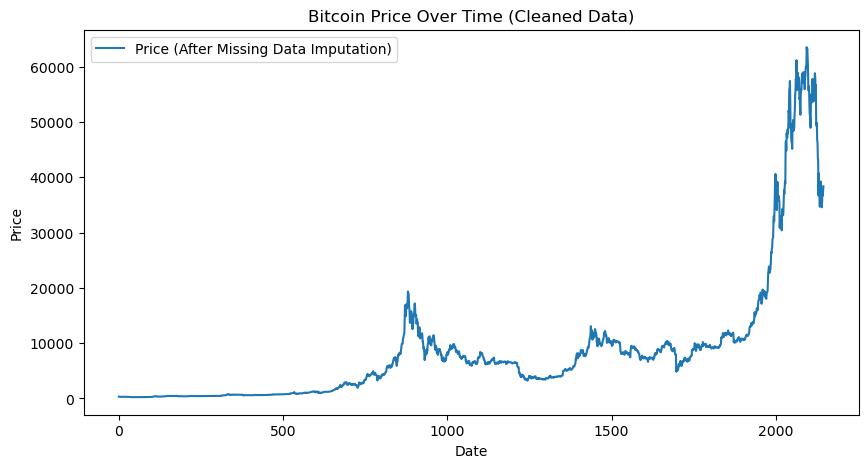

In [25]:
# Plot the 'price' column after handling missing data
plt.figure(figsize=(10, 5))
plt.plot(df['price'], label='Price (After Missing Data Imputation)')
plt.title('Bitcoin Price Over Time (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2146 non-null   datetime64[ns]
 1   top_0              2146 non-null   object        
 2   top_1              2119 non-null   object        
 3   top_2              2047 non-null   object        
 4   top_3              1849 non-null   object        
 5   top_4              1629 non-null   object        
 6   top_5              1382 non-null   object        
 7   top_6              1156 non-null   object        
 8   top_7              980 non-null    object        
 9   top_8              842 non-null    object        
 10  top_9              742 non-null    object        
 11  top_10             670 non-null    object        
 12  top_11             587 non-null    object        
 13  top_12             502 non-null    object        
 14  top_13  

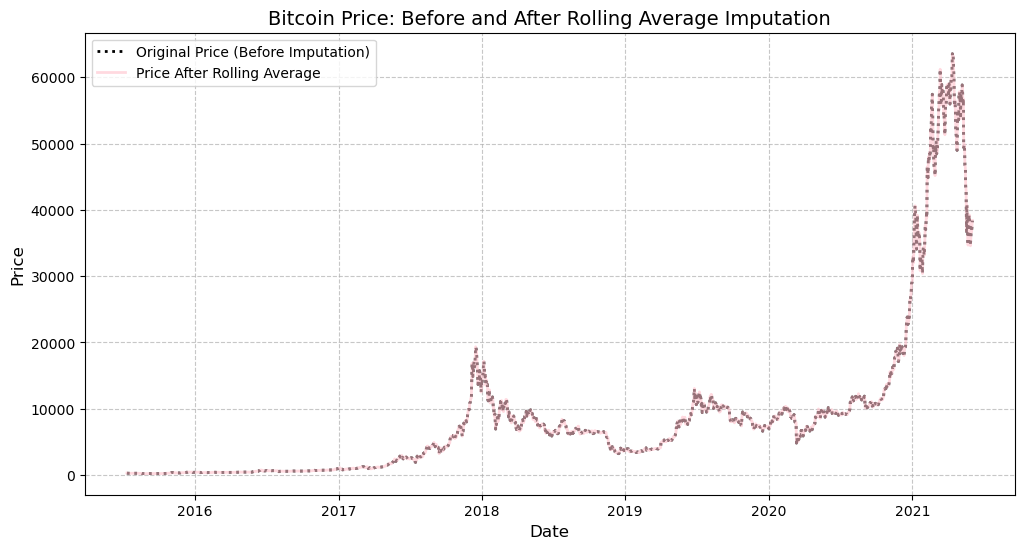

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the rolling average for the 'price' column with a window of 7 days
df['price_rolling_avg'] = df['price'].rolling(window=7, min_periods=1).mean()

# Store the original 'price' before imputation
original_price = df['price'].copy()

# Fill missing values with the rolling average
df['price'] = df['price'].fillna(df['price_rolling_avg'])

# Plot the original vs. cleaned (after rolling average)
plt.figure(figsize=(12, 6))

# Plot the original 'price' data (before imputation) with black dotted line
plt.plot(df['date'], original_price, label='Original Price (Before Imputation)', color='black', linestyle=':', linewidth=2)

# Plot the cleaned 'price' data (after rolling average) with pink solid line and reduced opacity
plt.plot(df['date'], df['price'], label='Price After Rolling Average', color='pink', linestyle='-', linewidth=2, alpha=0.6)

# Title and labels
plt.title('Bitcoin Price: Before and After Rolling Average Imputation', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()

# Show gridlines to improve readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# <font color ="006179">  3. Identifying Outliers in Time Series</font>

# <font color ="006179">  a. Visualize outliers using box plots and time series plots.</font> 

# <font color ="006179"> Box Plot for Outlier Detection</font>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2146 non-null   datetime64[ns]
 1   top_0              2146 non-null   object        
 2   top_1              2119 non-null   object        
 3   top_2              2047 non-null   object        
 4   top_3              1849 non-null   object        
 5   top_4              1629 non-null   object        
 6   top_5              1382 non-null   object        
 7   top_6              1156 non-null   object        
 8   top_7              980 non-null    object        
 9   top_8              842 non-null    object        
 10  top_9              742 non-null    object        
 11  top_10             670 non-null    object        
 12  top_11             587 non-null    object        
 13  top_12             502 non-null    object        
 14  top_13  

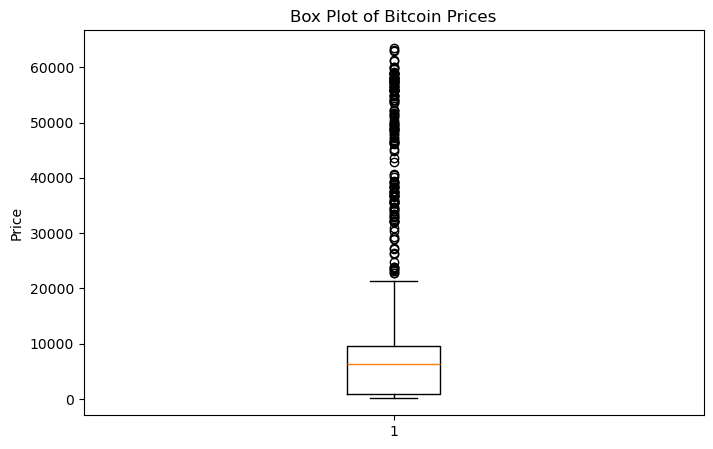

In [29]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['price'])
plt.title('Box Plot of Bitcoin Prices')
plt.ylabel('Price')
plt.show()

# <font color ="006179"> Visualise Time series plots</font>

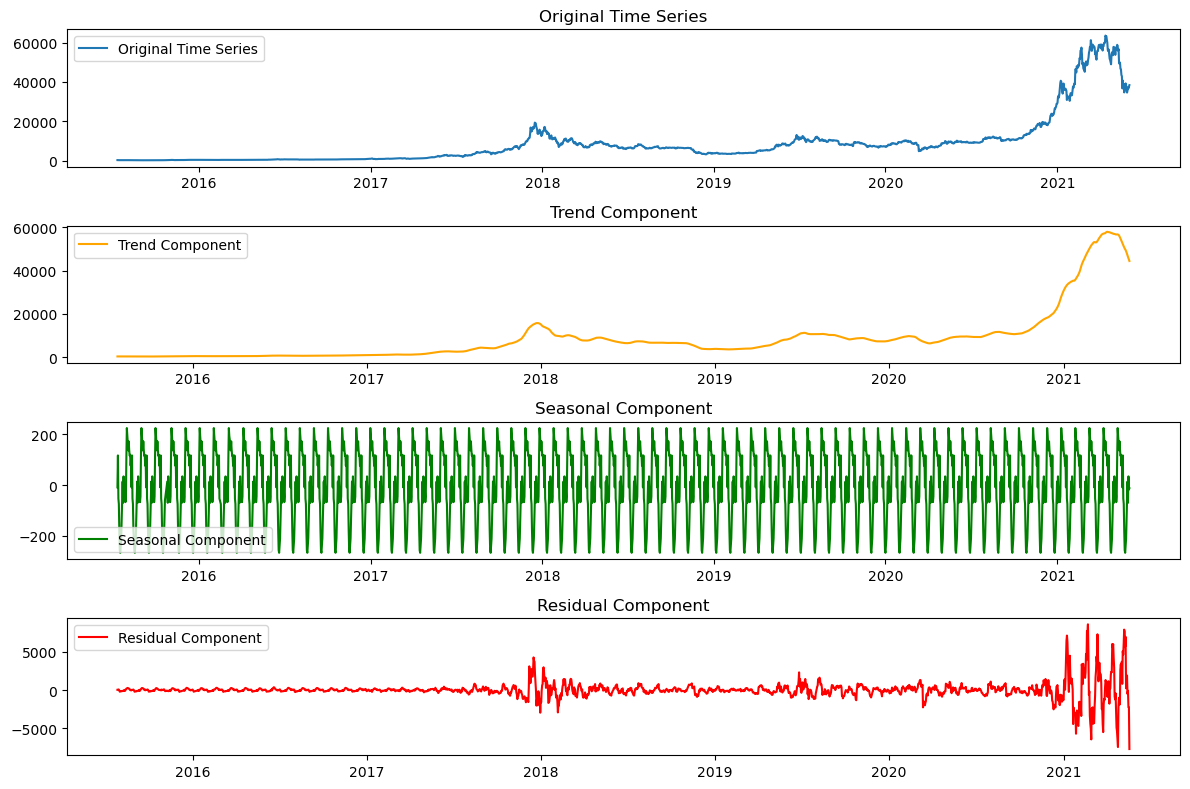

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset (assuming 'df' has 'date' and 'price' columns)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Temporarily set 'date' as index, but keep it as a column in the dataframe
df_temp = df.copy()
df_temp.set_index('date', inplace=True)

# Decompose the time series (assuming daily frequency)
decomposition = seasonal_decompose(df_temp['price'], model='additive', period=30)  # period=30 for monthly seasonality

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Plot the original time series
plt.subplot(411)
plt.plot(df_temp['price'], label='Original Time Series')
plt.legend(loc='best')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')
# Plot the residual component (optional)
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# <font color ="006179">  b. Explore the way to find outliers in time series</font>   

In [31]:
# Check for missing values in the original time series
missing_data = df['price'].isna()
missing_dates = df[missing_data]
print(missing_dates)

Empty DataFrame
Columns: [date, top_0, top_1, top_2, top_3, top_4, top_5, top_6, top_7, top_8, top_9, top_10, top_11, top_12, top_13, top_14, top_15, top_16, top_17, top_18, top_19, top_20, top_21, top_22, top_23, top_24, top_25, top_26, top_27, top_28, top_29, top_30, top_31, top_32, top_33, top_34, top_35, price, open, high, low, volume, change_percent, short_mavg, long_mavg, price_zscore, price_rolling_avg]
Index: []

[0 rows x 47 columns]


In [32]:
# Interpolate missing values based on time series structure
df['price'] = df['price'].interpolate(method='linear')

# Or use forward fill (propagate last valid observation)
df['price'] = df['price'].fillna(method='ffill')

C:\Users\singh\AppData\Local\Temp\ipykernel_31076\3917504353.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['price'] = df['price'].fillna(method='ffill')


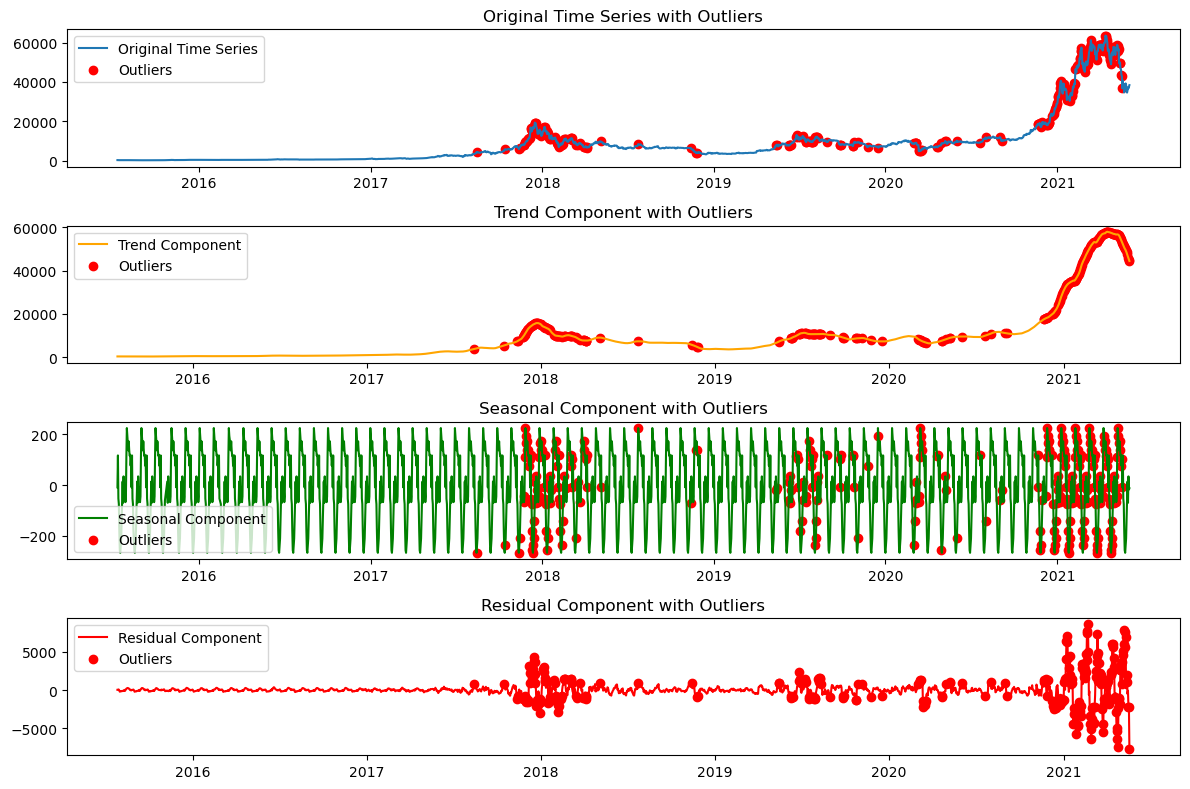

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset (assuming 'df' has 'date' and 'price' columns)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Temporarily set 'date' as index, but keep it as a column in the dataframe
df_temp = df.copy()
df_temp.set_index('date', inplace=True)

# Decompose the time series (assuming daily frequency)
decomposition = seasonal_decompose(df_temp['price'], model='additive', period=30)  # period=30 for monthly seasonality

# Calculate IQR for outlier detection (based on residuals)
residuals = decomposition.resid.dropna()
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the residuals
outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

# Align outliers with the original dataframe (df)
outliers_dates = outliers.index  # Dates of the outliers from the residuals
outlier_prices = df.loc[df['date'].isin(outliers_dates), 'price']  # Get corresponding price values from original df

# Plot the decomposition with outliers highlighted
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(df['date'], df['price'], label='Original Time Series')  # Using 'date' and 'price' from original df
plt.scatter(outliers_dates, outlier_prices, color='red', label='Outliers')
plt.legend(loc='best')
plt.title('Original Time Series with Outliers')

# Trend component
plt.subplot(412)
plt.plot(df_temp.index, decomposition.trend, label='Trend Component', color='orange')
plt.scatter(outliers_dates, decomposition.trend[outliers_dates], color='red', label='Outliers')
plt.legend(loc='best')
plt.title('Trend Component with Outliers')

# Seasonal component
plt.subplot(413)
plt.plot(df_temp.index, decomposition.seasonal, label='Seasonal Component', color='green')
plt.scatter(outliers_dates, decomposition.seasonal[outliers_dates], color='red', label='Outliers')
plt.legend(loc='best')
plt.title('Seasonal Component with Outliers')

# Residual component
plt.subplot(414)
plt.plot(df_temp.index, decomposition.resid, label='Residual Component', color='red')
plt.scatter(outliers_dates, decomposition.resid[outliers_dates], color='red', label='Outliers')
plt.legend(loc='best')
plt.title('Residual Component with Outliers')

plt.tight_layout()
plt.show()


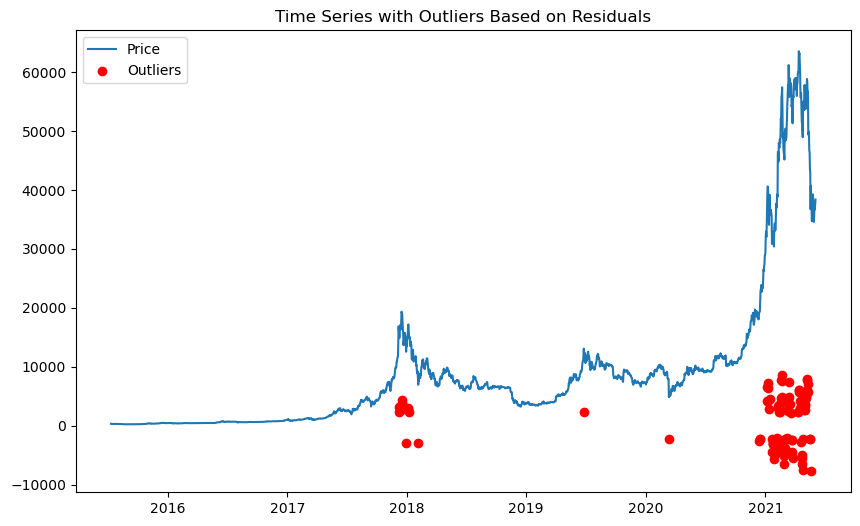

In [34]:
import statsmodels.api as sm

# Perform time series decomposition
result = sm.tsa.seasonal_decompose(df['price'], model='additive', period=30)  # period depends on your data's seasonality

# Extract the residuals
residuals = result.resid

# Calculate mean and standard deviation of residuals
mean_residual = residuals.mean()
std_residual = residuals.std()

# Define outliers as points that are more than 2 standard deviations away
outliers = residuals[(residuals < (mean_residual - 2 * std_residual)) | 
                     (residuals > (mean_residual + 2 * std_residual))]

# Visualize outliers in the time series
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Price')
plt.scatter(df['date'].loc[outliers.index], outliers, color='red', label='Outliers')
plt.legend()
plt.title('Time Series with Outliers Based on Residuals')
plt.show()


# <font color ="006179"> 4. Exploring Moving Averages in Time Series</font>   

# <font color ="006179"> Part 1: Calculate Simple and Exponential Moving Averages</font>    


In [35]:
# Short-term and long-term window sizes
short_term_window = 30  # 30 days for short-term trend
long_term_window = 150  # 150 days for long-term trend

# Simple Moving Averages (SMA)
df['SMA_short'] = df['price'].rolling(window=short_term_window).mean()
df['SMA_long'] = df['price'].rolling(window=long_term_window).mean()

# Exponential Moving Averages (EMA)
df['EMA_short'] = df['price'].ewm(span=short_term_window, adjust=False).mean()
df['EMA_long'] = df['price'].ewm(span=long_term_window, adjust=False).mean()

# <font color ="006179"> Part 2: Analyze Short-term vs. Long-term Moving Averages</font>   

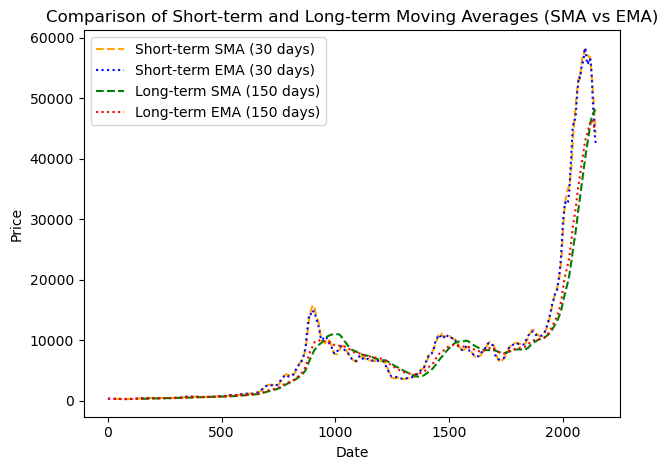

Numerical values for the last 10 rows:
         price     SMA_short     EMA_short      SMA_long      EMA_long
2136  38378.3  49793.433333  47112.235674  47622.616667  45504.640862
2137  39249.2  49301.056667  46604.943050  47709.202667  45421.787341
2138  38417.3  48747.083333  46076.708015  47784.932667  45329.012674
2139  35662.5  48107.786667  45404.823627  47840.176000  45200.979394
2140  34584.6  47475.246667  44706.744683  47878.282000  45060.365097
2141  35652.8  46739.663333  44122.619219  47922.971333  44935.761586
2142  37298.6  46056.046667  43682.359915  47975.896000  44834.607128
2143  36687.6  45392.173333  43231.085082  48005.858000  44726.699749
2144  37555.8  44738.373333  42864.937657  48036.504000  44631.720944
2145  38372.7  44226.080000  42575.115873  48078.838000  44548.820004


In [36]:
# Original Price Data

# Plot Short-term SMA and EMA
plt.plot(df['SMA_short'], label=f'Short-term SMA ({short_term_window} days)', color='orange', linestyle='--')
plt.plot(df['EMA_short'], label=f'Short-term EMA ({short_term_window} days)', color='blue', linestyle=':')

# Plot Long-term SMA and EMA
plt.plot(df['SMA_long'], label=f'Long-term SMA ({long_term_window} days)', color='green', linestyle='--')
plt.plot(df['EMA_long'], label=f'Long-term EMA ({long_term_window} days)', color='red', linestyle=':')

# Title and labels
plt.title('Comparison of Short-term and Long-term Moving Averages (SMA vs EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

# Get a sample of the last few rows (or select specific dates you are interested in)
sample_dates = df[['price', 'SMA_short', 'EMA_short', 'SMA_long', 'EMA_long']].tail(10)
print("Numerical values for the last 10 rows:\n", sample_dates)

# <font color ="006179"> Part 3:  Visualization</font>   

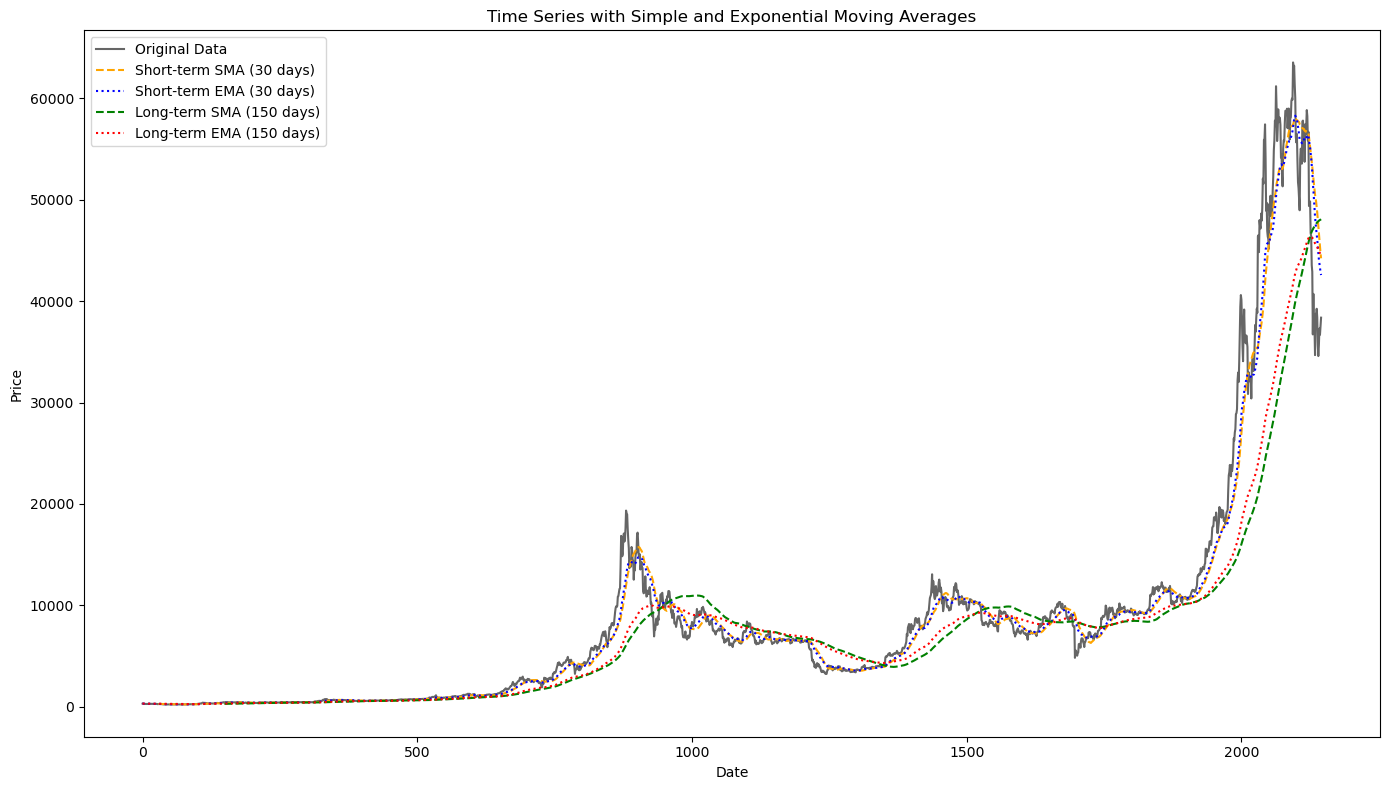

In [37]:
# Part 3: Visualize the Moving Averages with the Original Data
plt.figure(figsize=(14, 8))

# Plot the original price data
plt.plot(df['price'], label='Original Data', color='black', alpha=0.6)

# Plot short-term SMA and EMA
plt.plot(df['SMA_short'], label=f'Short-term SMA ({short_term_window} days)', color='orange', linestyle='--')
plt.plot(df['EMA_short'], label=f'Short-term EMA ({short_term_window} days)', color='blue', linestyle=':')

# Plot long-term SMA and EMA
plt.plot(df['SMA_long'], label=f'Long-term SMA ({long_term_window} days)', color='green', linestyle='--')
plt.plot(df['EMA_long'], label=f'Long-term EMA ({long_term_window} days)', color='red', linestyle=':')

# Title and labels
plt.title('Time Series with Simple and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

# <font color ="006179"> 5. Exploring Lag Variables in Time Series</font>   

# <font color ="006179"> a.Use autocorrelation functions (ACF) and partial autocorrelation functions (PACF) to identify significant lags.</font> 

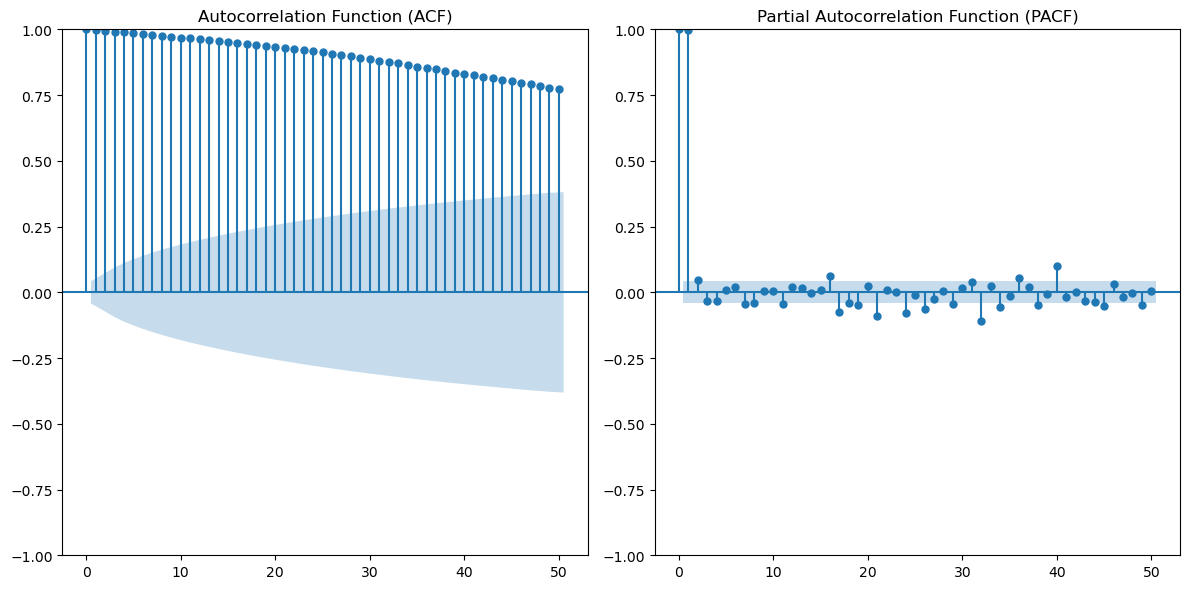

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Plot ACF and PACF for the 'price' time series
plt.figure(figsize=(12, 6))

# ACF (Autocorrelation Function)
plt.subplot(121)
plot_acf(df['price'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF (Partial Autocorrelation Function)
plt.subplot(122)
plot_pacf(df['price'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

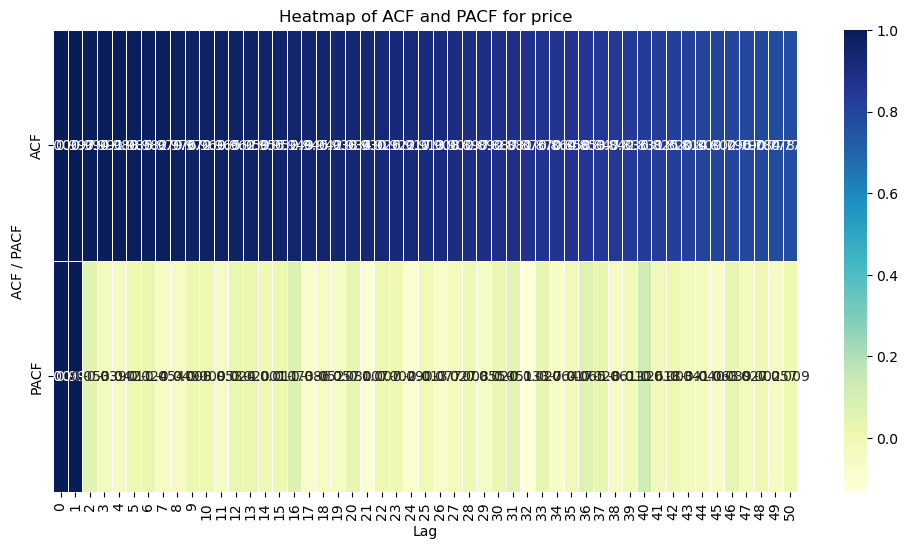

In [39]:
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF
acf_values = acf(df['price'], nlags=50)
pacf_values = pacf(df['price'], nlags=50)

# Create a DataFrame for ACF and PACF to plot as heatmap
acf_df = pd.DataFrame(acf_values, columns=["ACF"])
pacf_df = pd.DataFrame(pacf_values, columns=["PACF"])

# Create a combined dataframe for heatmap plotting
combined_df = pd.concat([acf_df, pacf_df], axis=1)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.T, annot=True, cmap="YlGnBu", cbar=True, fmt='.3f', linewidths=0.5)
plt.title('Heatmap of ACF and PACF for price')
plt.xlabel('Lag')
plt.ylabel('ACF / PACF')
plt.show()


# <font color ="006179"> b. Understand the importance of lag variables in forecasting</font> 

# <font color ="006179"> 6. Metrics for Time Series Prediction</font> 

# <font color ="006179"> 7. Developing a Time Series Model with Facebook Prophet</font>  

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [41]:
df_0 = df['price']

# <font color ="006179"> Fit an ARIMA Model</font>  

In [42]:
# Define the model
model = ARIMA(df_0, order=(0, 0, 5))

# Fit the model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

c:\Users\singh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2146
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -20443.990
Date:                Thu, 17 Oct 2024   AIC                          40901.980
Time:                        18:43:51   BIC                          40941.679
Sample:                             0   HQIC                         40916.505
                               - 2146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8650.0877    633.250     13.660      0.000    7408.940    9891.235
ma.L1          1.1358      0.021     53.304      0.000       1.094       1.178
ma.L2          0.7177      0.013     53.688      0.0

c:\Users\singh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# <font color ="006179"> MODEL A: Fit an ARIMA Model using Facebook Prophet</font>   

In [43]:
from prophet import Prophet

In [44]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

18:43:53 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing


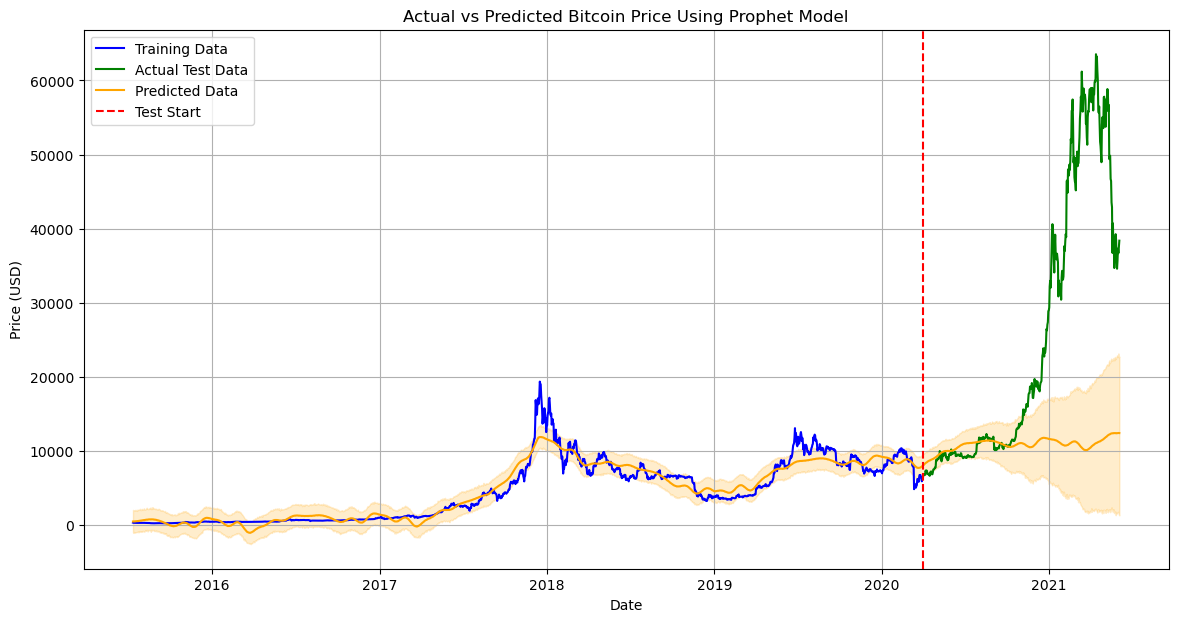

In [45]:
from sklearn.model_selection import train_test_split

# Import Prophet
from prophet import Prophet

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)  # 80% train, 20% test

# Prepare data for Prophet using the training set
df_prophet = train[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

# Initialize and fit the Prophet model
model_A = Prophet()
model_A.fit(df_prophet)

# Forecast
future = model_A.make_future_dataframe(periods=len(test))  # Forecast for the length of the test set
forecast_A = model_A.predict(future)

# Prepare the forecast DataFrame to include only the relevant columns
forecast_df = forecast_A[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Merge the actual test data with the forecast data
merged_df = pd.merge(test[['date', 'price']], forecast_df, left_on='date', right_on='ds', how='right')

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train['date'], train['price'], label='Training Data', color='blue')  # Training data
plt.plot(test['date'], test['price'], label='Actual Test Data', color='green')  # Actual test data
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicted Data', color='orange')  # Predicted data
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='orange', alpha=0.2)  # Confidence intervals
plt.axvline(x=test['date'].iloc[0], color='red', linestyle='--', label='Test Start')  # Line indicating the start of the test data

# Add titles and labels
plt.title('Actual vs Predicted Bitcoin Price Using Prophet Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Merge the actual test data with the forecast data
# Ensure the forecast only includes test period
merged_df = pd.merge(test[['date', 'price']], forecast_df[['ds', 'yhat']], left_on='date', right_on='ds', how='right')

# Drop any rows with NaN values (if the forecast extends beyond the test set)
merged_df.dropna(inplace=True)

# Step 2: Calculate MAE
mae = mean_absolute_error(merged_df['price'], merged_df['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Step 3: Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['price'], merged_df['yhat']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 14674.513852369639
Root Mean Squared Error (RMSE): 22852.597974353725


# <font color ="006179"> MODEL B: Fit an ARIMA Model using Lag and MAV </font>   

C:\Users\singh\AppData\Local\Temp\ipykernel_31076\3664081154.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SMA_short'] = train['y'].rolling(window=short_term_window).mean()
C:\Users\singh\AppData\Local\Temp\ipykernel_31076\3664081154.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SMA_mid'] = train['y'].rolling(window=mid_term_window).mean()
C:\Users\singh\AppData\Local\Temp\ipykernel_31076\3664081154.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

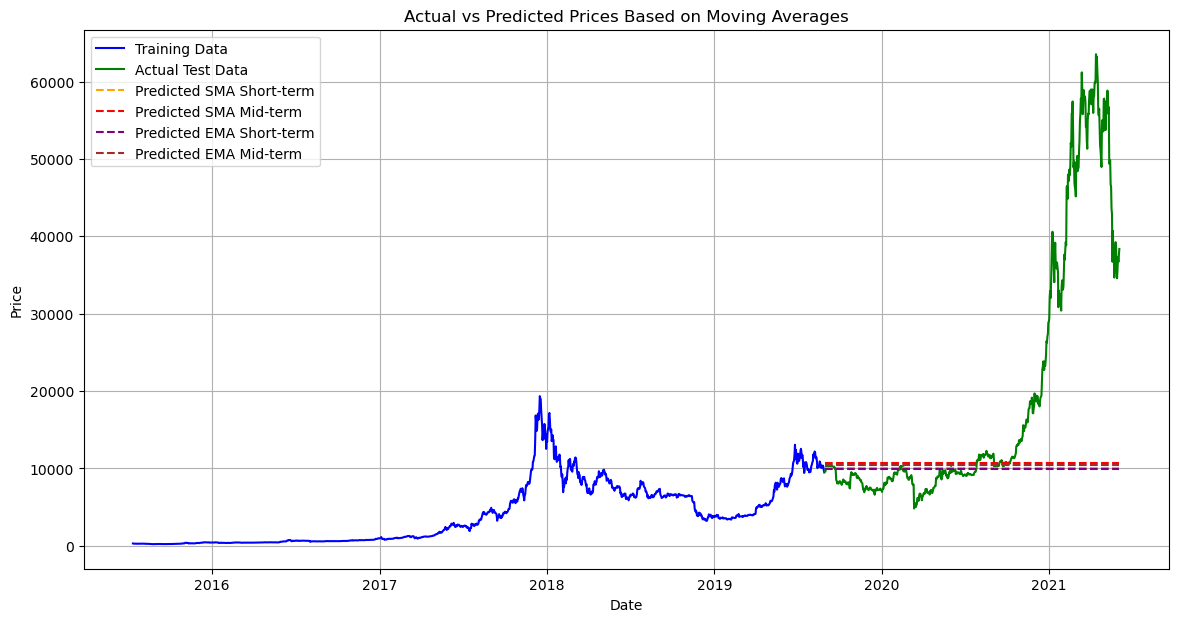

Mean Absolute Error (MAE) for Short-term SMA Predictions: 10883.025421472936
Root Mean Squared Error (RMSE) for Short-term SMA Predictions: 19291.36448265768
Mean Absolute Error (MAE) for Mid-term SMA Predictions: 10901.68546583851
Root Mean Squared Error (RMSE) for Mid-term SMA Predictions: 18992.72217290029
Mean Absolute Error (MAE) for Short-term EMA Predictions: 10887.34446291784
Root Mean Squared Error (RMSE) for Short-term EMA Predictions: 19331.274608312524
Mean Absolute Error (MAE) for Mid-term EMA Predictions: 10881.460526279287
Root Mean Squared Error (RMSE) for Mid-term EMA Predictions: 19120.137044727402
             ds        y  Predicted_SMA_short  Predicted_SMA_mid  \
2136 2021-05-25  38378.3         10061.857143       10700.206667   
2137 2021-05-26  39249.2         10061.857143       10700.206667   
2138 2021-05-27  38417.3         10061.857143       10700.206667   
2139 2021-05-28  35662.5         10061.857143       10700.206667   
2140 2021-05-29  34584.6         100

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define window sizes for Moving Averages
short_term_window = 7   # 7 days for short-term trend
mid_term_window = 30    # 30 days for mid-term trend

# Calculate Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
df['SMA_short'] = df['price'].rolling(window=short_term_window).mean()
df['SMA_mid'] = df['price'].rolling(window=mid_term_window).mean()
df['EMA_short'] = df['price'].ewm(span=short_term_window, adjust=False).mean()
df['EMA_mid'] = df['price'].ewm(span=mid_term_window, adjust=False).mean()

# Prepare the dataframe for Prophet (renaming columns for Prophet compatibility)
df_prophet = df[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

# Split the data into 70% train and 30% test
train_size = int(len(df_prophet) * 0.7)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# Fit the Moving Averages on the training data
train['SMA_short'] = train['y'].rolling(window=short_term_window).mean()
train['SMA_mid'] = train['y'].rolling(window=mid_term_window).mean()
train['EMA_short'] = train['y'].ewm(span=short_term_window, adjust=False).mean()
train['EMA_mid'] = train['y'].ewm(span=mid_term_window, adjust=False).mean()

# Ensure there are enough data points for predictions
test_start_index = short_term_window if short_term_window > mid_term_window else mid_term_window

# Predict the values for the test set using the last available SMA and EMA values from the training data
test['Predicted_SMA_short'] = train['SMA_short'].iloc[-1]  # Last value of short-term SMA
test['Predicted_SMA_mid'] = train['SMA_mid'].iloc[-1]      # Last value of mid-term SMA
test['Predicted_EMA_short'] = train['EMA_short'].iloc[-1]  # Last value of short-term EMA
test['Predicted_EMA_mid'] = train['EMA_mid'].iloc[-1]      # Last value of mid-term EMA

# Fill the predicted values for the duration of the test set
test['Predicted_SMA_short'] = test['Predicted_SMA_short'].ffill()
test['Predicted_SMA_mid'] = test['Predicted_SMA_mid'].ffill()
test['Predicted_EMA_short'] = test['Predicted_EMA_short'].ffill()
test['Predicted_EMA_mid'] = test['Predicted_EMA_mid'].ffill()

# Calculate MAE and RMSE for the short-term predictions
mae_sma_short = mean_absolute_error(test['y'], test['Predicted_SMA_short'])
rmse_sma_short = np.sqrt(mean_squared_error(test['y'], test['Predicted_SMA_short']))

# Calculate MAE and RMSE for the mid-term predictions
mae_sma_mid = mean_absolute_error(test['y'], test['Predicted_SMA_mid'])
rmse_sma_mid = np.sqrt(mean_squared_error(test['y'], test['Predicted_SMA_mid']))

# Calculate MAE and RMSE for the short-term EMA predictions
mae_ema_short = mean_absolute_error(test['y'], test['Predicted_EMA_short'])
rmse_ema_short = np.sqrt(mean_squared_error(test['y'], test['Predicted_EMA_short']))

# Calculate MAE and RMSE for the mid-term EMA predictions
mae_ema_mid = mean_absolute_error(test['y'], test['Predicted_EMA_mid'])
rmse_ema_mid = np.sqrt(mean_squared_error(test['y'], test['Predicted_EMA_mid']))

# Plot the actual vs predicted values along with SMA and EMA
plt.figure(figsize=(14, 7))

# Training data
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')

# Actual test data
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='green')

# Predicted SMA
plt.plot(test['ds'], test['Predicted_SMA_short'], label='Predicted SMA Short-term', color='orange', linestyle='--')
plt.plot(test['ds'], test['Predicted_SMA_mid'], label='Predicted SMA Mid-term', color='red', linestyle='--')

# Predicted EMA
plt.plot(test['ds'], test['Predicted_EMA_short'], label='Predicted EMA Short-term', color='purple', linestyle='--')
plt.plot(test['ds'], test['Predicted_EMA_mid'], label='Predicted EMA Mid-term', color='brown', linestyle='--')

# Add titles and labels
plt.title('Actual vs Predicted Prices Based on Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Mean Absolute Error (MAE) for Short-term SMA Predictions: {mae_sma_short}")
print(f"Root Mean Squared Error (RMSE) for Short-term SMA Predictions: {rmse_sma_short}")
print(f"Mean Absolute Error (MAE) for Mid-term SMA Predictions: {mae_sma_mid}")
print(f"Root Mean Squared Error (RMSE) for Mid-term SMA Predictions: {rmse_sma_mid}")

print(f"Mean Absolute Error (MAE) for Short-term EMA Predictions: {mae_ema_short}")
print(f"Root Mean Squared Error (RMSE) for Short-term EMA Predictions: {rmse_ema_short}")
print(f"Mean Absolute Error (MAE) for Mid-term EMA Predictions: {mae_ema_mid}")
print(f"Root Mean Squared Error (RMSE) for Mid-term EMA Predictions: {rmse_ema_mid}")

# Display the last 10 rows of actual vs predicted values from the test set
result_df = test.copy()
print(result_df[['ds', 'y', 'Predicted_SMA_short', 'Predicted_SMA_mid', 'Predicted_EMA_short', 'Predicted_EMA_mid']].tail(10))


C:\Users\singh\AppData\Local\Temp\ipykernel_31076\475703394.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.ffill(inplace=True)
C:\Users\singh\AppData\Local\Temp\ipykernel_31076\475703394.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.ffill(inplace=True)
18:59:38 - cmdstanpy - INFO - Chain [1] start processing
18:59:41 - cmdstanpy - INFO - Chain [1] done processing


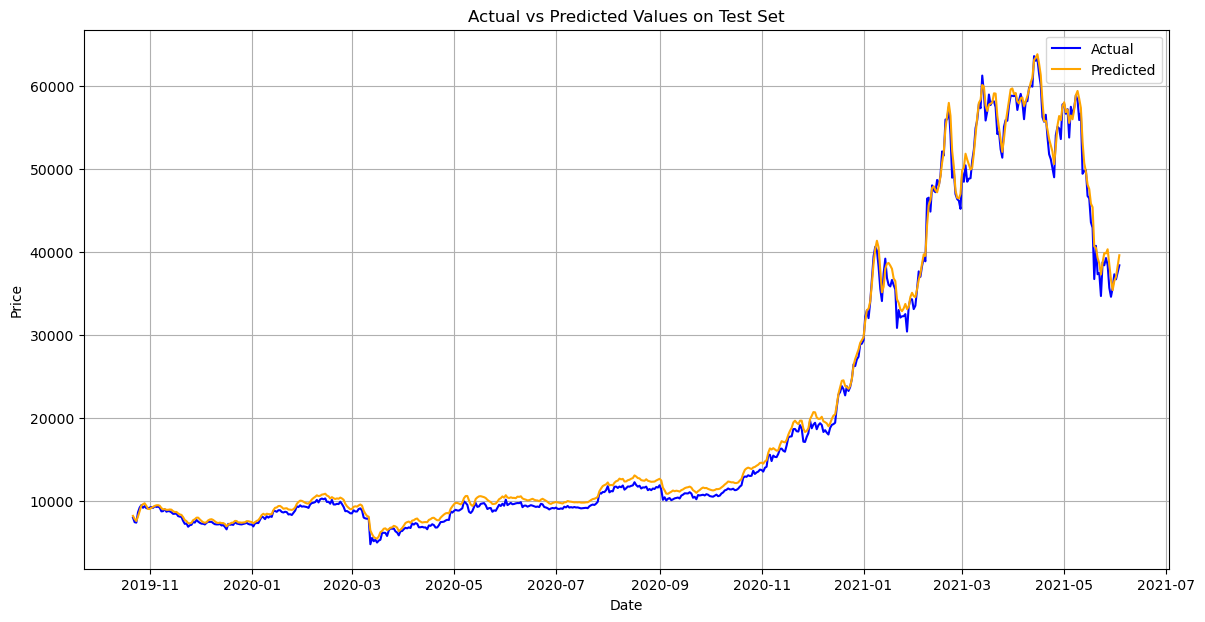

Mean Absolute Error (MAE): 733.2940930050501
Root Mean Squared Error (RMSE): 904.6128497030311
R-squared: nan
             ds        y  Predicted_Prices
2136 2021-05-25  38378.3      39845.943847
2137 2021-05-26  39249.2      39803.446550
2138 2021-05-27  38417.3      40304.563899
2139 2021-05-28  35662.5      38427.017181
2140 2021-05-29  34584.6      36669.922258
2141 2021-05-30  35652.8      35389.151111
2142 2021-05-31  37298.6      36484.007535
2143 2021-06-01  36687.6      36987.014255
2144 2021-06-02  37555.8      38247.043268
2145 2021-06-03  38372.7      39584.763480


c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

# Define window sizes for Moving Averages
short_term_window = 7   # 7 days for short-term trend
mid_term_window = 30    # 30 days for mid-term trend
long_term_window = 180  # 180 days for long-term trend

# Calculate Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
df['SMA_7'] = df['price'].rolling(window=short_term_window).mean()
df['SMA_30'] = df['price'].rolling(window=mid_term_window).mean()
df['SMA_180'] = df['price'].rolling(window=long_term_window).mean()
df['EMA_7'] = df['price'].ewm(span=short_term_window, adjust=False).mean()
df['EMA_30'] = df['price'].ewm(span=mid_term_window, adjust=False).mean()
df['EMA_180'] = df['price'].ewm(span=long_term_window, adjust=False).mean()

# Drop rows with NaN in any of the relevant columns used for the model
df_clean = df.dropna(subset=['SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180', 'price', 'open', 'high', 'low', 'volume', 'change_percent'])

# Fill forward remaining missing values
df_clean.ffill(inplace=True)

# Prepare the cleaned dataset for Prophet
df_prophet = df_clean[['date', 'price', 'SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180']].rename(columns={'date': 'ds', 'price': 'y'})

# Split the data into 70% train and 30% test
train_size = int(len(df_prophet) * 0.7)
train, test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# Check if train has sufficient rows to fit the model
if train.shape[0] < 2:
    raise ValueError('Training DataFrame has less than 2 non-NaN rows. Please check your input data.')

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.add_regressor('SMA_7')
prophet_model.add_regressor('SMA_30')
prophet_model.add_regressor('SMA_180')
prophet_model.add_regressor('EMA_7')
prophet_model.add_regressor('EMA_30')
prophet_model.add_regressor('EMA_180')
prophet_model.fit(train)

# Create a dataframe for future predictions (same period as the test set)
future_test = test[['ds', 'SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180']].copy()

# Predict on the test set
forecast_test = prophet_model.predict(future_test)

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='orange')
plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse = mean_squared_error(test['y'], forecast_test['yhat'], squared=False)
r_squared = 1 - (sum((test['y'] - forecast_test['yhat'])**2) / sum((test['y'] - test['y'].mean())**2))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r_squared}')

# Display the last 10 rows of actual vs predicted values
result_df = test.copy()
result_df['Predicted_Prices'] = forecast_test['yhat'].values
print(result_df[['ds', 'y', 'Predicted_Prices']].tail(10))
